In [1]:
import numpy as np
from control.control_system import *

## parameters
mCart = 1  # cart mass
mPend = 1  # pendulum mass
G = 9.81   # gravity of earth
L = 0.5    # pendulum length
Kd = 10    # cart damping

f = lambda x, u: np.array(
        [x[1],
        (u - Kd*x[1] - mPend*L*x[3]**2*np.sin(x[2]) + mPend*G*np.sin(x[2])*np.cos(x[2])) / (mCart + mPend*np.sin(x[2])**2),
        x[3],
        ((u - Kd*x[1] - mPend*L*x[3]**2*np.sin(x[2]))*np.cos(x[2])/(mCart + mPend) + G*np.sin(x[2])) / (L - mPend*L*np.cos(x[2])**2/(mCart + mPend))]
)

g = lambda x, u: np.array([x[0], x[2]])
x0 = np.array([0, 0, -np.pi, 0])

ct_sys = ContinuousControlSystem(f, g)

t = np.linspace(0, 10, 1000)
x, y = ct_sys.sim(x0, t, 0)


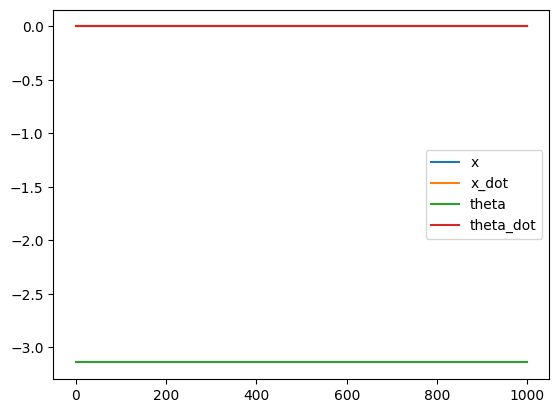

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, label=['x', 'x_dot', 'theta', 'theta_dot'])
plt.legend()

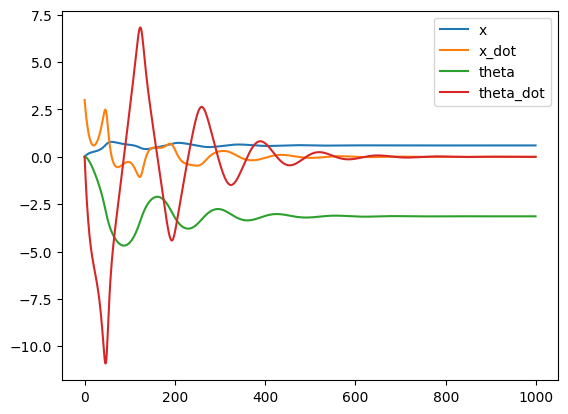

In [3]:
x0 = np.array([0, 3, 0, 0])
x, y = ct_sys.sim(x0, t, 0)
plt.plot(x, label=['x', 'x_dot', 'theta', 'theta_dot'])
plt.legend()


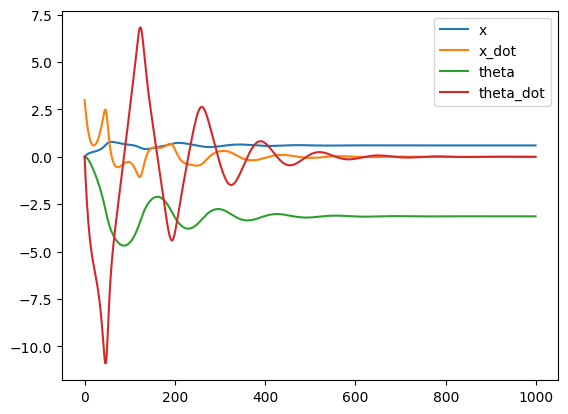

In [4]:
dt_sys = discretize_system(ct_sys, dt=0.01)
x, y = dt_sys.sim(x0, t, 0)
plt.plot(x, label=['x', 'x_dot', 'theta', 'theta_dot'])
plt.legend()